# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
dataset=pd.read_csv("PolynomialRegressionData.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. Simple Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) # Learning with the whole data

LinearRegression()

### Data Visualization (Entire)

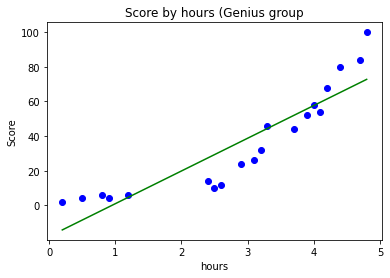

In [44]:
plt.scatter(X,y,color='blue')
plt.plot(X,reg.predict(X), color ='green') # line graph
plt.title("Score by hours (Genius group")
plt.xlabel("hours")
plt.ylabel("Score")
plt.show()

In [45]:
reg.score(X,y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2 Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # n차 방정식
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> if x is 3, it transforms into: [1, 3, 9]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [47]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [48]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) # Learning with the transformed X, and y (data)

LinearRegression()

### Data Visualization (transformed X and y)

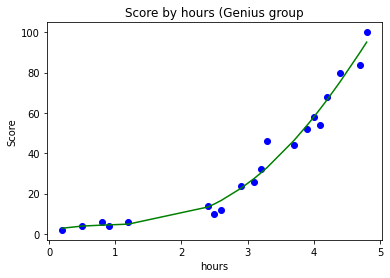

In [50]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)), color ='green') # line graph
plt.title("Score by hours (Genius group")
plt.xlabel("hours")
plt.ylabel("Score")
plt.show()

In [51]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [52]:
X_range.shape

(46,)

In [53]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [54]:
X.shape

(20, 1)

In [55]:
X_range = X_range.reshape(-1, 1) # (row, column) #row 개수는 자동으로 계산 컬럼은 1개
X_range.shape

(46, 1)

In [56]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

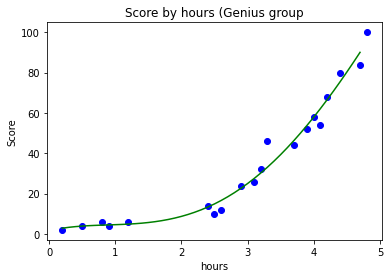

In [57]:
plt.scatter(X,y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)), color ='green') # line graph
plt.title("Score by hours (Genius group")
plt.xlabel("hours")
plt.ylabel("Score")
plt.show()

# SMOOTH line~~

### 공부시간에 따른 시험 성적 예측 (Prediction of test scores according to study time)

In [58]:
reg.predict([[2]]) # Prediction of linear regression model when the study time is 2 hours

array([19.85348988])

In [59]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # Prediction of polynomial regression model when the study time is 2 hours

array([8.70559135])

In [60]:
lin_reg.score(X_poly, y)

0.9782775579000045